In [37]:
#On my honor, as a student, I, Jared Bennett, have neither given nor received unauthorized aid on this academic work.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Business/Data Understanding

The purpose of looking at this data is to understand the reasons or factors that played into fans choosing to not renew their season tickets (Y2defects). This will help with knowing who to target, based on the variables chosen, when advertising for the next season when tickets become available. If this is successful, then the hope is that it will keep current season ticket holders around, while refining the information needed to help increase season ticket holder sales.

## Cleaning Model Processing

In [39]:
#read in file
df = pd.read_excel("train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [40]:
#look at data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


In [41]:
#look for missing/null values
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD       4667
GNDR           0
OWNHOME        0
SPORT       4943
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [42]:
#changing all missing values to NaN
df = df.replace(r'\s+', np.nan, regex=True)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,NaN,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,NaN,0.0,1.0,0.0,NaN,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,NaN,1.0,1.0,0.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,NaN,1.0,1.0,0.0,NaN,65,194


In [43]:
#looking at all null values 
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
CHILD       8634
GNDR         498
OWNHOME     1999
SPORT       4943
COMP        8207
PCTMARR        0
HOMEVAL        0
dtype: int64

In [44]:
#dropping child column because there are too many null values
del df["CHILD"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 18 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
GNDR        8718 non-null float64
OWNHOME     7217 non-null float64
SPORT       4273 non-null float64
COMP        1009 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(6), int64(11), object(1)
memory usage: 1.3+ MB


In [45]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
GNDR         498
OWNHOME     1999
SPORT       4943
COMP        8207
PCTMARR        0
HOMEVAL        0
dtype: int64

In [46]:
#deleting sport column because there are too many null values
del df["SPORT"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 17 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
GNDR        8718 non-null float64
OWNHOME     7217 non-null float64
COMP        1009 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(5), int64(11), object(1)
memory usage: 1.2+ MB


In [47]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
GNDR         498
OWNHOME     1999
COMP        8207
PCTMARR        0
HOMEVAL        0
dtype: int64

In [48]:
#deleting comp column because there are too many null values
del df["COMP"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 16 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
GNDR        8718 non-null float64
OWNHOME     7217 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 1.1+ MB


In [49]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
GNDR         498
OWNHOME     1999
PCTMARR        0
HOMEVAL        0
dtype: int64

In [50]:
#set missing values in the INCOME column to be the average income
df['INCOME'].fillna((df['INCOME'].mean()), inplace=True)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.000000,0.0,1.0,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,2.882151,0.0,0.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.000000,0.0,1.0,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.000000,1.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.000000,1.0,1.0,65,194


In [51]:
#set missing values in the AGE column to be the average income
df['AGE'].fillna((df['AGE'].mean()), inplace=True)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.000000,4.000000,0.0,1.0,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,61.392912,2.882151,0.0,0.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.000000,2.000000,0.0,1.0,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.000000,4.000000,1.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.000000,4.000000,1.0,1.0,65,194


In [52]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
GNDR         498
OWNHOME     1999
PCTMARR        0
HOMEVAL        0
dtype: int64

In [53]:
df.corr()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
Y2defect,1.000000,-0.101921,0.028869,-0.040159,-0.109634,-0.141604,-0.023498,-0.139099,-0.189929,-0.023682,0.010034,0.008438,-0.022388,-0.023869,0.029722
Y1G5,-0.101921,1.000000,0.092901,-0.150656,0.116103,0.123291,0.043975,0.121479,0.045319,0.029633,-0.000152,-0.008892,0.020323,0.008064,-0.000382
Y1G4,0.028869,0.092901,1.000000,-0.082485,-0.076326,-0.094967,-0.003481,-0.095750,-0.090743,-0.061933,0.008038,-0.002689,0.044501,0.001259,0.001030
Y1G3,-0.040159,-0.150656,-0.082485,1.000000,-0.091538,-0.135977,-0.045239,-0.100829,0.005308,-0.028065,0.019778,-0.001742,-0.030716,-0.006574,0.001812
Y1G2,-0.109634,0.116103,-0.076326,-0.091538,1.000000,0.206763,0.061990,0.320802,0.276530,0.099442,-0.013586,-0.005443,-0.004643,0.019234,-0.013760
Y1G1,-0.141604,0.123291,-0.094967,-0.135977,0.206763,1.000000,-0.003982,0.244241,0.256153,0.087177,-0.028292,-0.026223,-0.002491,0.024756,-0.014693
Y1price,-0.023498,0.043975,-0.003481,-0.045239,0.061990,-0.003982,1.000000,0.043768,-0.090287,-0.028857,0.071066,0.045249,-0.018029,0.008032,0.095580
YEARS,-0.139099,0.121479,-0.095750,-0.100829,0.320802,0.244241,0.043768,1.000000,0.533836,0.285470,-0.089773,-0.013408,-0.011307,0.023691,-0.049689
BACKER,-0.189929,0.045319,-0.090743,0.005308,0.276530,0.256153,-0.090287,0.533836,1.000000,0.183853,-0.085234,-0.024022,-0.018135,0.032558,-0.064727
AGE,-0.023682,0.029633,-0.061933,-0.028065,0.099442,0.087177,-0.028857,0.285470,0.183853,1.000000,-0.216520,0.019336,-0.071125,-0.051534,-0.014447


In [54]:
df['INCOME'] = df['INCOME'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 16 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null float64
INCOME      9216 non-null int64
GNDR        8718 non-null float64
OWNHOME     7217 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(3), int64(12), object(1)
memory usage: 1.1+ MB


## Data Visualization

In [55]:
df.describe()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
count,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,8718.000000,7217.000000,9216.000000,9216.000000
mean,0.500000,0.337023,0.510525,0.636719,0.291124,0.480252,19.963108,6.378038,0.489475,61.392912,2.696072,0.447236,0.718581,58.228516,112.111220
std,0.500027,0.472718,0.499916,0.480971,0.454305,0.499637,8.820188,2.873927,0.499916,14.691011,1.676938,0.497237,0.449722,12.902173,92.292223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,4.000000,0.000000,51.000000,2.000000,0.000000,0.000000,52.000000,56.000000
50%,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,15.000000,6.000000,0.000000,61.392912,2.000000,0.000000,1.000000,61.000000,81.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,9.000000,1.000000,72.000000,4.000000,1.000000,1.000000,67.000000,132.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,24.000000,1.000000,97.000000,6.000000,1.000000,1.000000,99.000000,600.000000


In [56]:
pd.pivot_table(df,index=["Y2defect"])

,AGE,BACKER,GNDR,HOMEVAL,INCOME,OWNHOME,PCTMARR,Y1G1,Y1G2,Y1G3,Y1G4,Y1G5,Y1price,YEARS
Y2defect,,,,,,,,,,,,,,
0,61.740804,0.584418,0.443044,109.368273,2.685764,0.728631,58.536458,0.550998,0.340929,0.656033,0.496094,0.385200,20.170356,6.777778
1,61.045019,0.394531,0.451435,114.854167,2.706380,0.708495,57.920573,0.409505,0.241319,0.617405,0.524957,0.288845,19.755859,5.978299


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002B30B748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002BDFADA0>]], dtype=object)

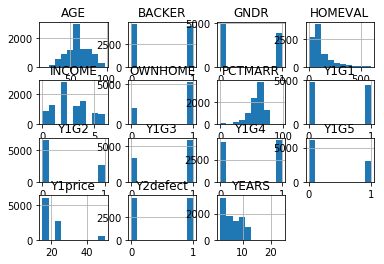

In [57]:
df.hist()

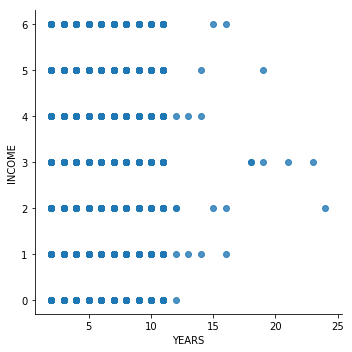

In [58]:
sns.lmplot('YEARS', 'INCOME', data=df, fit_reg=False)

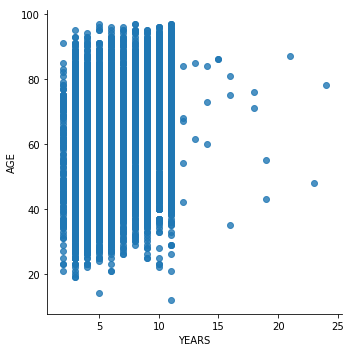

In [59]:
sns.lmplot('YEARS', 'AGE', data=df, fit_reg=False)

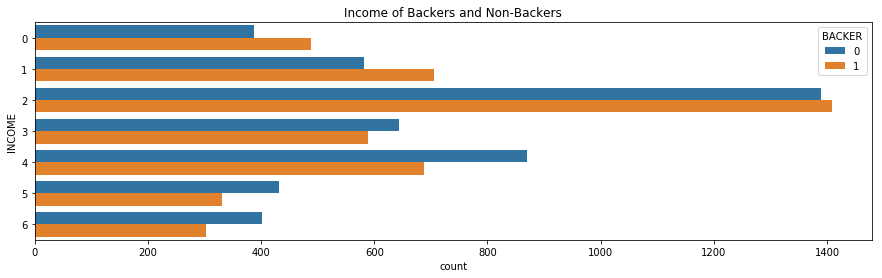

In [60]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="INCOME", hue='BACKER', data=df).set_title('Income of Backers and Non-Backers');

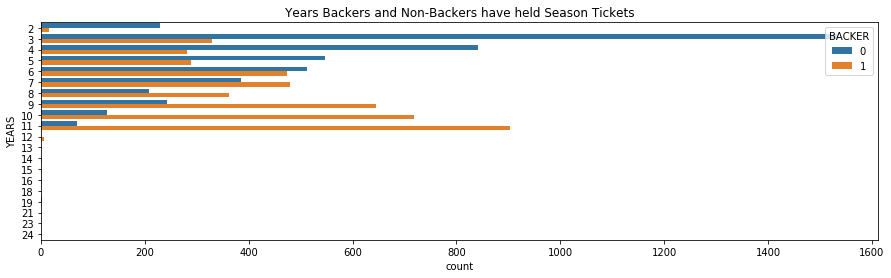

In [61]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="YEARS", hue='BACKER', data=df).set_title('Years Backers and Non-Backers have held Season Tickets');

## Exploritory Data Analysis

In [62]:
df.corr()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
Y2defect,1.000000,-0.101921,0.028869,-0.040159,-0.109634,-0.141604,-0.023498,-0.139099,-0.189929,-0.023682,0.006147,0.008438,-0.022388,-0.023869,0.029722
Y1G5,-0.101921,1.000000,0.092901,-0.150656,0.116103,0.123291,0.043975,0.121479,0.045319,0.029633,0.005065,-0.008892,0.020323,0.008064,-0.000382
Y1G4,0.028869,0.092901,1.000000,-0.082485,-0.076326,-0.094967,-0.003481,-0.095750,-0.090743,-0.061933,0.016696,-0.002689,0.044501,0.001259,0.001030
Y1G3,-0.040159,-0.150656,-0.082485,1.000000,-0.091538,-0.135977,-0.045239,-0.100829,0.005308,-0.028065,0.012170,-0.001742,-0.030716,-0.006574,0.001812
Y1G2,-0.109634,0.116103,-0.076326,-0.091538,1.000000,0.206763,0.061990,0.320802,0.276530,0.099442,-0.012900,-0.005443,-0.004643,0.019234,-0.013760
Y1G1,-0.141604,0.123291,-0.094967,-0.135977,0.206763,1.000000,-0.003982,0.244241,0.256153,0.087177,-0.027564,-0.026223,-0.002491,0.024756,-0.014693
Y1price,-0.023498,0.043975,-0.003481,-0.045239,0.061990,-0.003982,1.000000,0.043768,-0.090287,-0.028857,0.066227,0.045249,-0.018029,0.008032,0.095580
YEARS,-0.139099,0.121479,-0.095750,-0.100829,0.320802,0.244241,0.043768,1.000000,0.533836,0.285470,-0.087842,-0.013408,-0.011307,0.023691,-0.049689
BACKER,-0.189929,0.045319,-0.090743,0.005308,0.276530,0.256153,-0.090287,0.533836,1.000000,0.183853,-0.084785,-0.024022,-0.018135,0.032558,-0.064727
AGE,-0.023682,0.029633,-0.061933,-0.028065,0.099442,0.087177,-0.028857,0.285470,0.183853,1.000000,-0.218178,0.019336,-0.071125,-0.051534,-0.014447


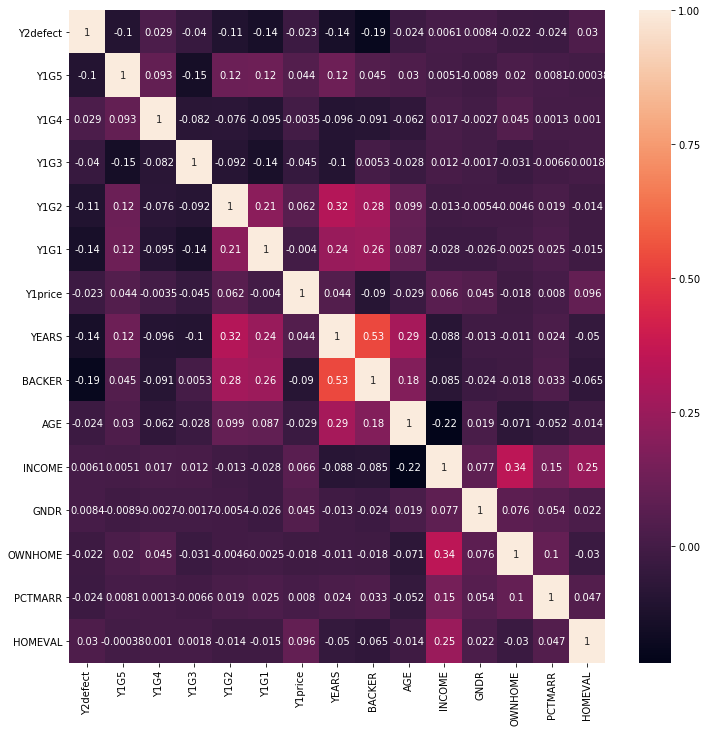

In [63]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

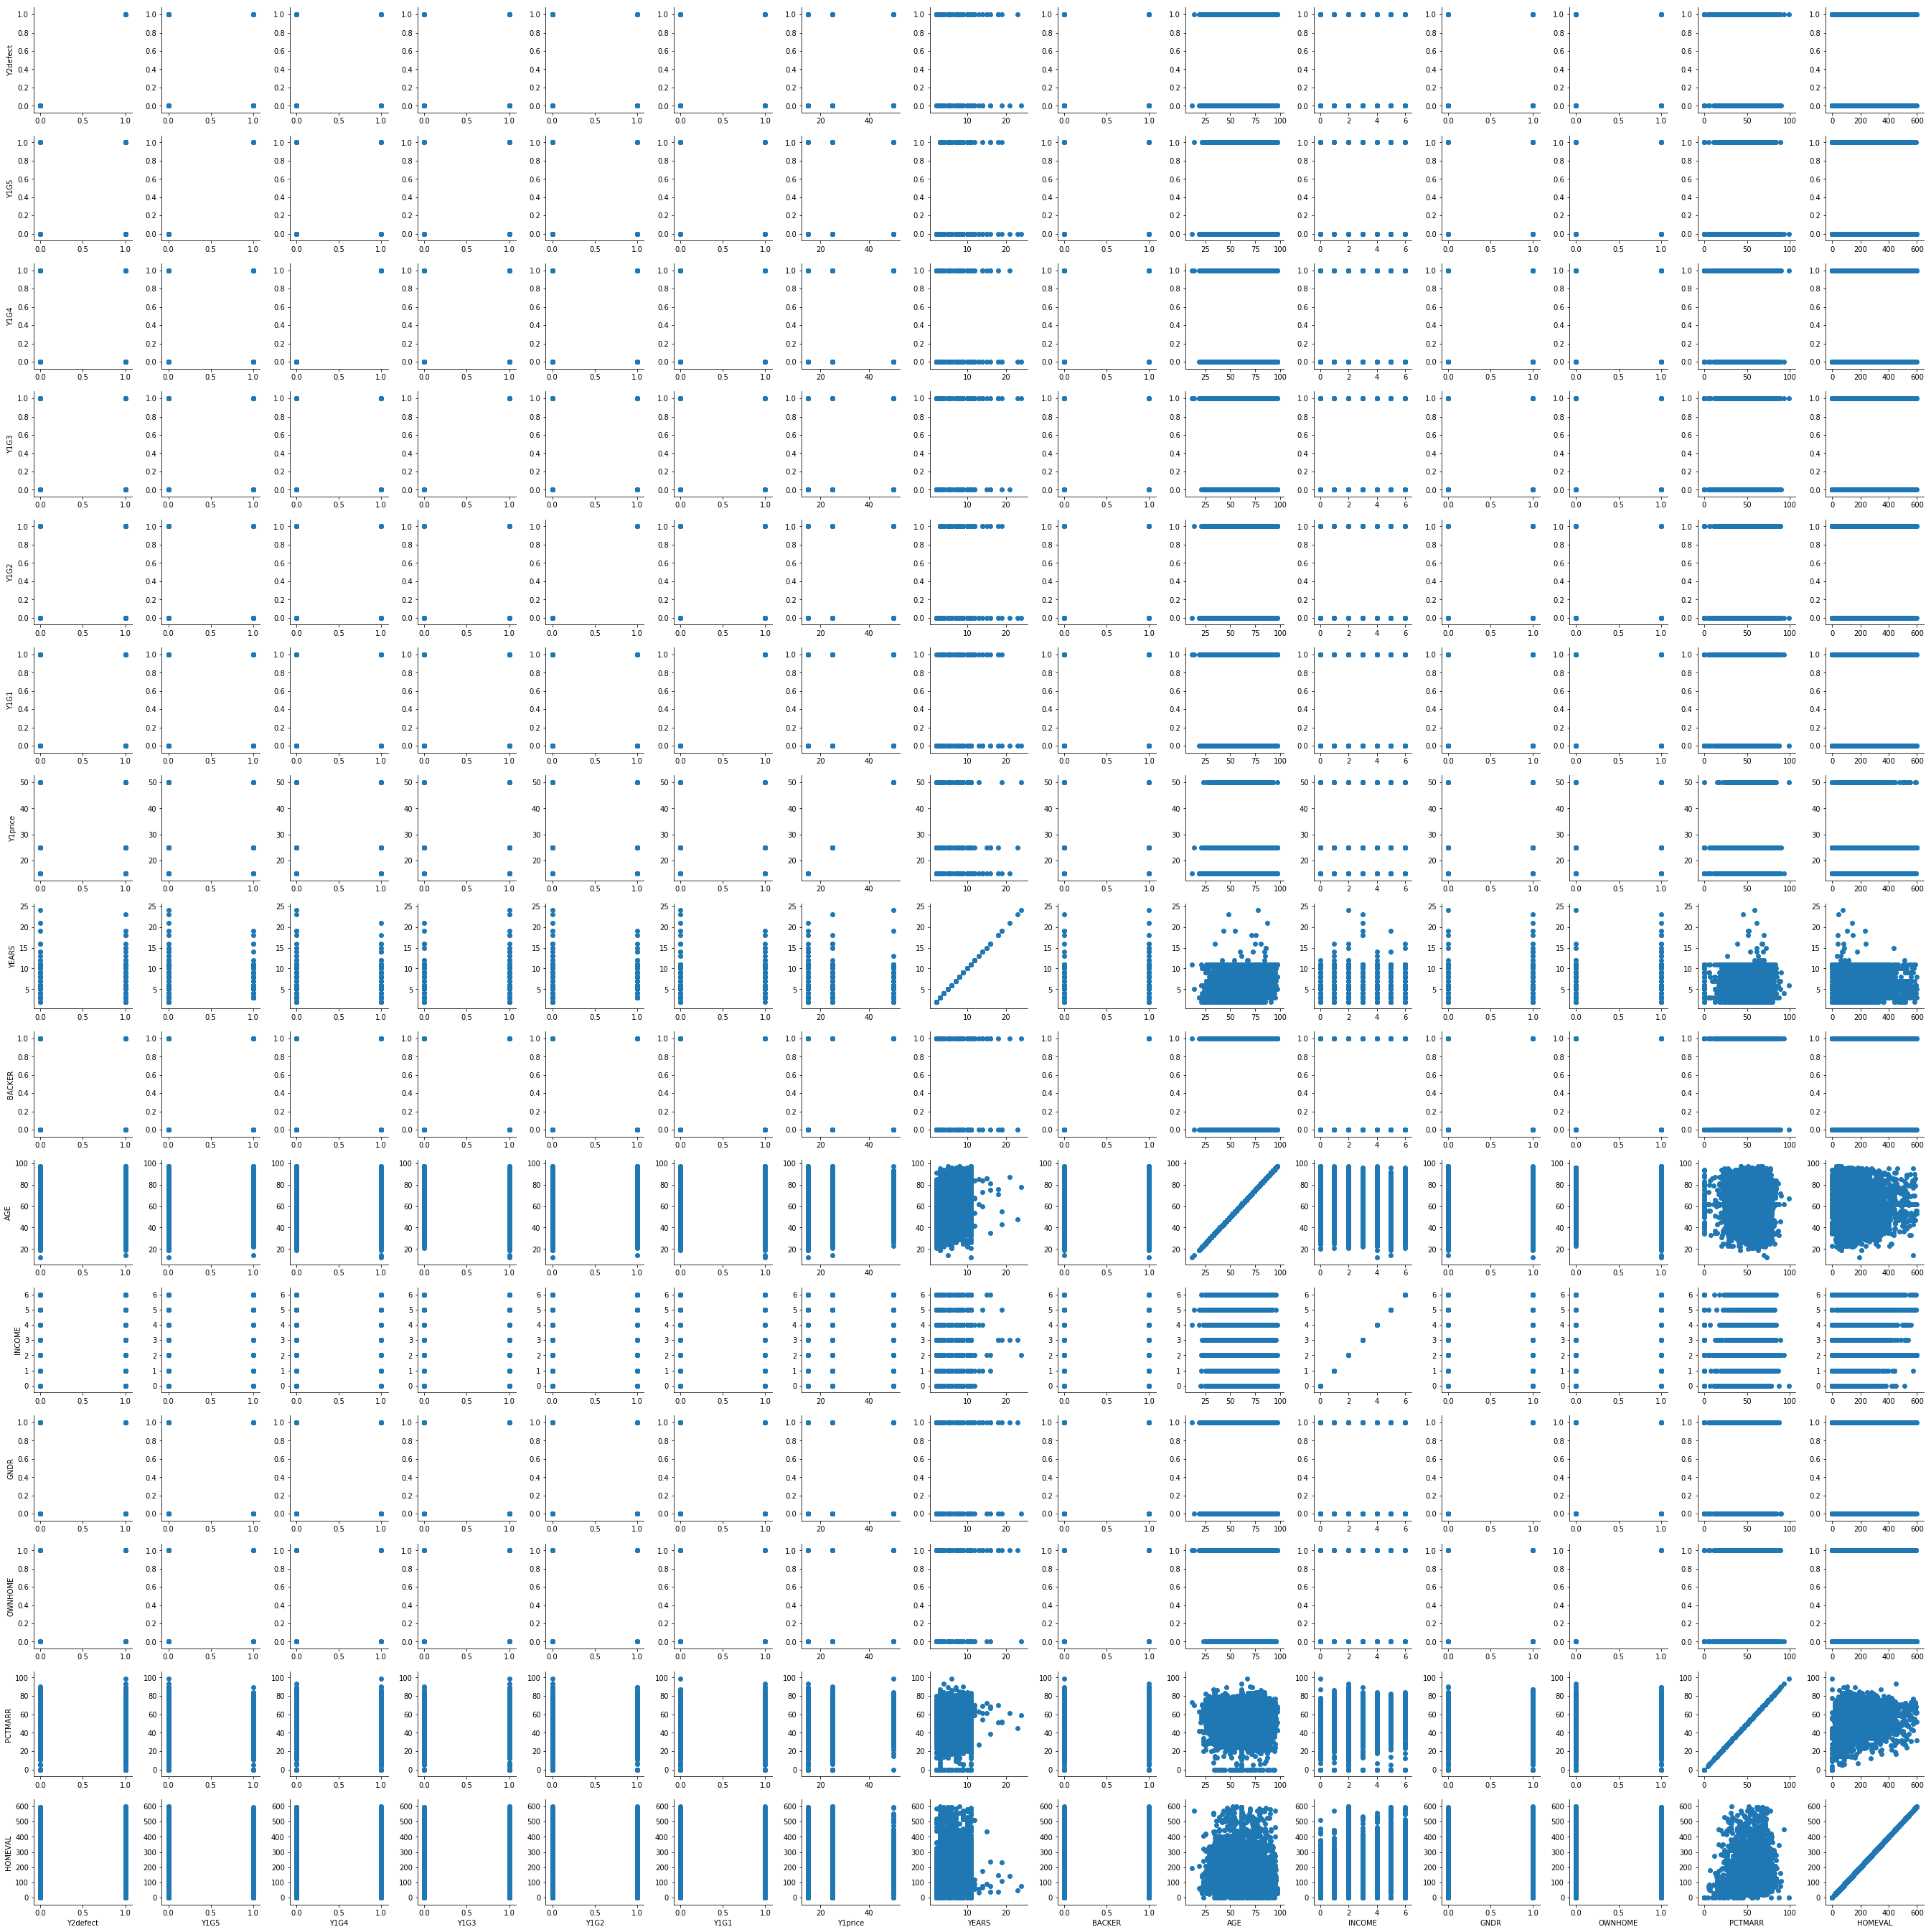

In [74]:
g = sns.PairGrid(df)
g.map(plt.scatter)

## Model Building and Deployment

#### Decision Tree Model

In [75]:
#set variables
y = df['Y2defect']
X = df[['BACKER', 'INCOME', 'YEARS']]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [77]:
#classify decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
#print results
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.592405063291
[[943 420]
 [707 695]]
             precision    recall  f1-score   support

          0       0.57      0.69      0.63      1363
          1       0.62      0.50      0.55      1402

avg / total       0.60      0.59      0.59      2765

0.593788299495


#### Logistic Regression

In [79]:
y = df['Y2defect']
X = df[['BACKER', 'INCOME', 'AGE', 'YEARS']]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.591681735986
[[799 564]
 [565 837]]
             precision    recall  f1-score   support

          0       0.59      0.59      0.59      1363
          1       0.60      0.60      0.60      1402

avg / total       0.59      0.59      0.59      2765

0.591605588076


In [82]:
#predictions
probs = lr.predict_proba(X_test)
print probs

[[ 0.42905553  0.57094447]
 [ 0.59857708  0.40142292]
 [ 0.61956292  0.38043708]
 ..., 
 [ 0.64124353  0.35875647]
 [ 0.58397866  0.41602134]
 [ 0.40245844  0.59754156]]


#### Model Selection

The decision tree model has the best score of .5937, while the logistic regression model has a score of .5916. The decision tree model will be the one recommended for use.

#### Final Analysis and Storytelling

Based on the findings, it appears that the factors that are most important when determining season ticket "defectors", or those that won't buy season tickets for the next season. The Backer variable is probably the most important followed by Income, Years as a Ticket Holder, and finally, Age. With these, you can more directly target those who might not renew their season tickets and market to them accordingly. 